In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
from pyiron import Project
from pyiron.table.datamining import PyironTable

In [3]:
pr = Project("Al_melting_point")
#pr.remove_jobs(recursive=True)

In [38]:
d_temp = 100
temp_range = np.arange(100, 1400, d_temp)
n_steps = 1e5
pressure = 0
size = 4
pot = 'Al_H_Ni_Angelo_eam'
pot_str = pot.replace("-", "_")
with pr.open(pot_str) as pr_sub:
    for temp in temp_range:
        job_name = "Al_temp_{}".format(temp)
        # print(job_name)
        supercell = pr_sub.create_ase_bulk("Al").repeat(size)
        job = pr_sub.create_job(pr.job_type.Lammps, job_name)
        job.structure = supercell
        job.potential = pot
        job.calc_md(temperature=temp, n_ionic_steps=n_steps, pressure=pressure)
        try:
            job.run()
        except RuntimeError:
            break
    job_minimize = pr_sub.create_job(pr.job_type.Lammps, "Al_minimize")
    job_minimize.structure = pr.load("Al_temp_{}".format(temp_range[0])).get_structure()
    job_minimize.calc_minimize(pressure=0)
    job_minimize.potential = pot
    job_minimize.run()

2020-04-13 18:45:28,276 - pyiron_log - WARNING - The job Al_temp_100 is being loaded instead of running. To re-run use the argument 'run_again=True'
2020-04-13 18:45:29,416 - pyiron_log - WARNING - The job Al_temp_200 is being loaded instead of running. To re-run use the argument 'run_again=True'
2020-04-13 18:45:30,755 - pyiron_log - WARNING - The job Al_temp_300 is being loaded instead of running. To re-run use the argument 'run_again=True'
2020-04-13 18:45:31,852 - pyiron_log - WARNING - The job Al_temp_400 is being loaded instead of running. To re-run use the argument 'run_again=True'
2020-04-13 18:45:32,883 - pyiron_log - WARNING - The job Al_temp_500 is being loaded instead of running. To re-run use the argument 'run_again=True'
2020-04-13 18:45:33,969 - pyiron_log - WARNING - The job Al_temp_600 is being loaded instead of running. To re-run use the argument 'run_again=True'
2020-04-13 18:45:35,008 - pyiron_log - WARNING - The job Al_temp_700 is being loaded instead of running. T

In [28]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,681,finished,Al64,Al_temp_300,/Al_temp_300,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:21:44.290940,2020-04-13 18:22:24.514769,40.0,pyiron@cmdell17#1,Lammps,0.1,None,None
1,682,finished,Al64,Al_temp_400,/Al_temp_400,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:22:27.651560,2020-04-13 18:23:07.914872,40.0,pyiron@cmdell17#1,Lammps,0.1,None,None
2,683,finished,Al64,Al_temp_500,/Al_temp_500,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:23:11.022494,2020-04-13 18:23:49.568540,38.0,pyiron@cmdell17#1,Lammps,0.1,None,None
3,684,finished,Al64,Al_temp_600,/Al_temp_600,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:23:52.605289,2020-04-13 18:24:30.158911,37.0,pyiron@cmdell17#1,Lammps,0.1,None,None
4,685,finished,Al64,Al_temp_700,/Al_temp_700,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:24:33.512224,2020-04-13 18:25:10.932431,37.0,pyiron@cmdell17#1,Lammps,0.1,None,None
5,686,finished,Al64,Al_temp_800,/Al_temp_800,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:25:13.962977,2020-04-13 18:25:52.250553,38.0,pyiron@cmdell17#1,Lammps,0.1,None,None
6,687,finished,Al64,Al_temp_900,/Al_temp_900,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:25:55.326765,2020-04-13 18:26:43.637383,48.0,pyiron@cmdell17#1,Lammps,0.1,None,None
7,688,finished,Al64,Al_temp_1000,/Al_temp_1000,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:26:48.353873,2020-04-13 18:27:42.457196,54.0,pyiron@cmdell17#1,Lammps,0.1,None,None
8,689,finished,Al64,Al_temp_1100,/Al_temp_1100,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:27:45.684345,2020-04-13 18:28:23.680978,37.0,pyiron@cmdell17#1,Lammps,0.1,None,None
9,690,finished,Al64,Al_temp_1200,/Al_temp_1200,/home/surendralal/,notebooks/pyiron-virtual-workshop-2020/tutorials/day_2/Al_melting_point/Al_H_Ni_Angelo_eam/,2020-04-13 18:28:26.965715,2020-04-13 18:29:10.312549,43.0,pyiron@cmdell17#1,Lammps,0.1,None,None


In [29]:
job = pr.load("Al_temp_200")

In [30]:
def get_average_etot(job):
    return np.average(job["output/generic/energy_tot"][-100:])

def get_average_temperature(job):
    return np.average(job["output/generic/temperature"])

def get_natoms(job):
    return len(job["output/structure/positions"])


In [31]:
pr_sub = Project("Al_melting_point/Al_H_Ni_Angelo_eam")

In [32]:
pt = PyironTable(pr_sub, "finite_temp")

In [33]:
pt.filter_function = lambda job: (job.status=="finished") 

In [34]:
pt.add["U"] = get_average_etot
pt.add["temp"] = get_average_temperature
pt.add["n_atoms"] = get_natoms

In [35]:
pt.create_table()

100%|██████████| 14/14 [00:00<00:00, 34.45it/s]


In [36]:
df = pt.get_dataframe()
df

,job_id,U,temp,n_atoms,col_0,col_1,col_2
0,681,-209.889679,299.470163,64,-,-,-
1,682,-206.713999,399.075299,64,-,-,-
2,683,-204.317559,500.013198,64,-,-,-
3,684,-202.226626,600.467476,64,-,-,-
4,685,-201.473745,701.934836,64,-,-,-
5,686,-198.837144,799.316361,64,-,-,-
6,687,-197.595917,897.326158,64,-,-,-
7,688,-196.272647,998.609033,64,-,-,-
8,689,-194.378189,1100.428185,64,-,-,-
9,690,-192.731913,1195.683789,64,-,-,-


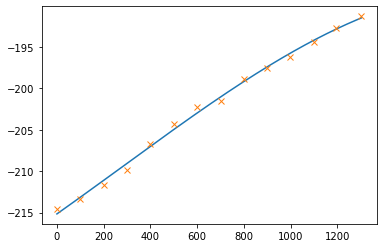

In [40]:
poly_deg = 3
U_list = np.array(df.U)
T_list = np.array(df.temp)
args = np.argsort(T_list)
U_list = U_list[args]
T_list = T_list[args]
p = np.polyfit(T_list, U_list, deg=poly_deg)
T_fit = np.linspace(T_list.min(), T_list.max(), 1001)
U_fit = np.poly1d(p)(T_fit)
plt.plot(T_fit, U_fit)
plt.plot(T_list, U_list, "x");